In [14]:

import os
import time
from nltk import pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import subprocess
from collections import Counter
import collections
import math
import matplotlib.pyplot as plt
import numpy as np

In [22]:
article = {'Article 12': {'caste': '20.6897', 'It': '13.7931', 'society': '13.7931', 'even': '10.3448', 'much': '10.3448'}, 'Article 01': {'people': '25', 'young': '21.875', 'youth': '18.75', 'It': '15.625', 'little': '12.5'}, 'Article 16': {'ideas': '13.8889', 'lynching': '11.1111', 'But': '11.1111', 'Mashal': '11.1111', 'students': '11.1111'}, 'Article 03': {'power': '16.2162', 'even': '13.5135', 'much': '10.8108', 'Fata': '10.8108', 'system': '10.8108'}, 'Article 13': {'China': '20', 'India': '16.6667', 'US': '16.6667', 'Iran': '13.3333', 'In': '13.3333'}, 'Article 10': {'system': '19.2308', 'opinion’': '15.3846', 'even': '15.3846', 'minister': '15.3846', 'prime': '15.3846'}, 'Article 15': {'India': '23.5294', 'Kumar': '14.7059', 'like': '14.7059', 'In': '14.7059', 'political': '14.7059'}, 'Article 05': {'people': '14.8148', 'many': '14.8148', 'power': '14.8148', 'one': '14.8148', 'Pakistan': '11.1111'}, 'Article 08': {'Sharif': '27.2727', 'people': '22.7273', 'state': '22.7273', 'power': '22.7273', 'Pakistan': '18.1818'}, 'Article 14': {'hate': '44.8276', 'politics': '24.1379', 'Baloch': '20.6897', 'another': '13.7931', 'violence': '13.7931'}, 'Article 18': {'great': '27.2727', 'I': '15.1515', '‘greatness’': '12.1212', 'people': '12.1212'}, 'Article 06': {'state': '25.9259', 'communities': '18.5185', 'world': '14.8148', 'Rohingyas': '14.8148', 'ethnic': '14.8148'}, 'Article 04': {'world': '19.3548', 'era': '19.3548', 'Trump': '19.3548', 'violence': '16.129', 'US': '16.129'}, 'Article 09': {'world': '22.5806', 'model': '16.129', 'resources': '16.129', 'imperative': '12.9032', 'ecological': '12.9032'}, 'Article 02': {'Musharraf': '40', 'political': '17.1429', 'Musharraf’s': '14.2857', 'It': '11.4286', 'time': '11.4286'}, 'Article 20': {'state': '20', 'one': '17.1429', 'violence': '14.2857', 'time': '14.2857', 'political': '11.4286'}, 'Article 11': {'bourgeoisie': '41.3793', 'society': '17.2414', 'democratisation': '13.7931', 'state': '13.7931', '‘educated’': '10.3448'}, 'Article 17': {'state': '28', 'left': '24', 'Pakistani': '20', 'years': '16', 'new': '16'}, 'Article 07': {'society’': '60.7143', '‘civil': '60.7143', 'state': '21.4286', '‘free': '17.8571', 'market’': '17.8571'}, 'Article 19': {'border': '26.6667', 'Afghanistan': '26.6667', 'state': '23.3333', 'people': '20', 'one': '16.6667'}}

In [23]:
def convert_to_dict(dictionary):
    dict_temp = {}
    for key, result in dictionary.items():
        for x in result:
            if x != '':
                temp = x.split()
                dict_temp[temp[0]] = temp[1].strip('()')
                
        dictionary[key] = dict_temp
        dict_temp = {}

    return dictionary
convert_to_dict(article)

IndexError: list index out of range

In [24]:

def removekey(d, key):
    r = dict(d)
    del r[key]
    return r



def handler(article):
    t = dict(article)
    for key, inner in t.items():
        i = dict(inner)
        for key, value in inner.items():
            if '"' in key or 'The' in key:
                temp =removekey(inner, key)
                #print(inner)
        i = temp

    return t
    
qwe = handler(article)

UnboundLocalError: local variable 'temp' referenced before assignment

In [5]:
qwe

{'articl': {'But': '12',
  'Nawaz': '18',
  'The': '18',
  'could': '12',
  'court': '10',
  'election': '10',
  'elections': '20',
  'may': '12',
  'next': '10',
  'option': '10',
  'political': '12'},
 'article10': {'2013': '13.0435',
  '2018': '10.8696',
  'N-League': '17.3913',
  'Nawaz': '10.8696',
  'PML-N': '17.3913',
  'PPP': '17.3913',
  'PTI': '15.2174',
  'Punjab': '10.8696',
  'So': '10.8696',
  'The': '28.2609',
  'Zardari': '10.8696',
  'like': '13.0435'},
 'article11': {'If': '11.8644',
  'Nawaz': '23.7288',
  'The': '18.6441',
  'boys': '10.1695',
  'shut': '11.8644'},
 'article12': {'Afghanistan': '10.3448',
  'But': '12.069',
  'China': '18.9655',
  'Pakistan': '12.069',
  'Russia': '15.5172',
  'The': '18.9655',
  'dismaying': '10.3448',
  'excitement': '12.069',
  'us': '13.7931'},
 'article13': {'Afghanistan': '13.5593',
  'And': '13.5593',
  'But': '11.8644',
  'Pakistan': '15.2542',
  'The': '22.0339',
  'lot': '13.5593',
  'militarised': '13.5593',
  'state': '1

In [25]:
def trim_dict(day_dict,n):
    td = {}
    for key, value in day_dict.items():
        if '1' in n:
            if len(key.split()) == 1:
                td[key] = value

        if '2' in n:
            if len(key.split()) == 2:
                td[key] = value

        if '3' in n:
            if len(key.split()) == 3:
                td[key] = value

        if '4' in n:
            if len(key.split()) == 4:
                td[key] = value

    return td

In [26]:
def updatekeys(d):
    temp = dict(d)
    temp = dict(Counter(temp).most_common(5))
    return temp

def get_top_words(dictionary):
    for key, value in dictionary.items():
        dictionary[key] = updatekeys(dictionary[key])
        
    return dictionary

get_top_words(article)

{'Article 01': {'It': '15.625',
  'little': '12.5',
  'people': '25',
  'young': '21.875',
  'youth': '18.75'},
 'Article 02': {'It': '11.4286',
  'Musharraf': '40',
  'Musharraf’s': '14.2857',
  'political': '17.1429',
  'time': '11.4286'},
 'Article 03': {'Fata': '10.8108',
  'even': '13.5135',
  'much': '10.8108',
  'power': '16.2162',
  'system': '10.8108'},
 'Article 04': {'Trump': '19.3548',
  'US': '16.129',
  'era': '19.3548',
  'violence': '16.129',
  'world': '19.3548'},
 'Article 05': {'Pakistan': '11.1111',
  'many': '14.8148',
  'one': '14.8148',
  'people': '14.8148',
  'power': '14.8148'},
 'Article 06': {'Rohingyas': '14.8148',
  'communities': '18.5185',
  'ethnic': '14.8148',
  'state': '25.9259',
  'world': '14.8148'},
 'Article 07': {'market’': '17.8571',
  'society’': '60.7143',
  'state': '21.4286',
  '‘civil': '60.7143',
  '‘free': '17.8571'},
 'Article 08': {'Pakistan': '18.1818',
  'Sharif': '27.2727',
  'people': '22.7273',
  'power': '22.7273',
  'state': '22

In [27]:
article = collections.OrderedDict(sorted(article.items()))

In [113]:
def autofill(x_coordinates, y_coordinates, words_in_dates, magnitude_per_words, area):

    x_coordinates = autofill_algorithm(x_coordinates, datatype='int')
    y_coordinates = autofill_algorithm(y_coordinates, datatype='int',append='one')
    words_in_dates = autofill_algorithm(words_in_dates, datatype='str')
    magnitude_per_words = autofill_algorithm(magnitude_per_words, datatype='int')
    area = autofill_algorithm(area, datatype='int')

    return x_coordinates, y_coordinates, words_in_dates, magnitude_per_words, area


def autofill_algorithm(lists, datatype=None, append=None):
    output_words = 5
    if datatype == 'int' and append == None:
        for i, value in enumerate(lists):
            if len(value) < output_words:
                while len(value) != output_words:
                    value.append(i + 1)
                    pass

        return lists
    
    if datatype == 'int' and append == 'one':
        for i, value in enumerate(lists):
            if len(value) < output_words:
                while len(value) != output_words:
                    value.append(1)
                    pass

        return lists


    if datatype == 'str':
        for i, value in enumerate(lists):
            if len(value) < output_words:
                while len(value) != output_words:
                    value.append('')
                    pass

        return lists




def get_coordinates(dictionary):

    dates = []
    words_in_dates = []
    magnitude_per_words = []
    temp_w = []
    temp_m = []
    temp_area = []
    area = []
    x_coordinates = []
    y_coordinates = []
    temp_x = []
    temp_y = []

    for day, value in dictionary.items():
        dates.append(day)
        for words, magnitude in value.items():
            temp_w.append(words)
            temp_m.append(float(magnitude))
            for x in magnitude.split():
                temp_area.append(round(2 * math.pi * float(x))*4)
                #temp_area.append(float(x))

        area.append(temp_area)
        words_in_dates.append(temp_w)
        magnitude_per_words.append(temp_m)
        temp_w = []
        temp_m = []
        temp_area = []


    for i in range(len(magnitude_per_words)):
        for j in range(len(magnitude_per_words[i])):
            temp_x.append(i + 1)
            temp_y.append(j + 1)
        x_coordinates.append(temp_x)
        y_coordinates.append(temp_y)
        temp_x = []
        temp_y = []


    #autofill(x_coordinates, y_coordinates, words_in_dates, magnitude_per_words, area)


    return dates ,x_coordinates, y_coordinates, words_in_dates, magnitude_per_words, area


In [114]:
dates ,x_coordinates, y_coordinates, words_in_dates, magnitude_per_words, area = get_coordinates(article)

AttributeError: 'str' object has no attribute 'items'

In [115]:
magnitude_per_words 

[[13.7931, 1, 1, 1, 1],
 [2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3],
 [4, 4, 4, 4, 4],
 [5, 5, 5, 5, 5],
 [6, 6, 6, 6, 6],
 [11.7647, 7, 7, 7, 7],
 [8, 8, 8, 8, 8],
 [9, 9, 9, 9, 9],
 [10.3448, 10, 10, 10, 10],
 [11, 11, 11, 11, 11],
 [12, 12, 12, 12, 12],
 [13, 13, 13, 13, 13],
 [14, 14, 14, 14, 14],
 [15, 15, 15, 15, 15],
 [16, 16, 16, 16, 16],
 [17.2414, 17, 17, 17, 17],
 [18, 18, 18, 18, 18],
 [60.7143, 19, 19, 19, 19],
 [20, 20, 20, 20, 20]]

In [116]:
def basic_plot(dates, x_coordinates, y_coordinates, words_in_dates,magnitude_per_words, area, individual=None):

    for i in range(len(dates)):
        for j in range(len(magnitude_per_words)):
            for k in range(len(magnitude_per_words[j])):
                plt.text(x=x_coordinates[j][k], y=y_coordinates[j][k], s=words_in_dates[j][k].replace(' ', '\n'),
                         fontsize=8, horizontalalignment='center', verticalalignment='center', rotation='vertical')
    
    if individual == None:
        plt.title("TOP JOURNALIST'S TRENDS FOR LAST 6 MONTHS")
        plt.ylabel('Number Of Trends')
        # xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
        plt.yticks(list(range(1, len(y_coordinates[0]) + 1)))
        plt.xticks(list(range(1, len(dates) + 1)), dates , rotation='vertical')
        plt.scatter(x=x_coordinates, y=y_coordinates, s=area, linewidths=2, edgecolor='w')
        plt.show()
        #grand_out_png = grand_out.strip('.out')+str('.png')
        #plt.savefig('img.png', format='png', dpi=1000,bbox_inches='tight')
        plt.clf()
    
    
    if individual != None:
        plt.title('Top Trends For '+individual+' Last 6 Months')
        plt.ylabel('Number Of Trends')
        # xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
        plt.yticks(list(range(1, len(y_coordinates[0]) + 1)))
        plt.xticks(list(range(1, len(dates) + 1)), dates , rotation='vertical')
        plt.scatter(x=x_coordinates, y=y_coordinates, s=area, linewidths=2, edgecolor='w')
        plt.show()
        
        #plt.savefig(individual+'.png', format='png', dpi=1000,bbox_inches='tight')
        plt.clf()
        

        


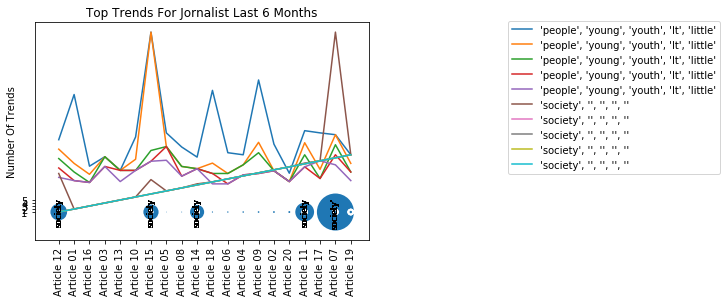

In [117]:
basic_plot(dates, x_coordinates, y_coordinates, words_in_dates,magnitude_per_words, area, individual='Jornalist')

In [118]:
global find_me1
global find_me2
global find_me3
global find_me4
global condition

find_me1 = 'Society'.strip().lower()  # ['PSP', 'MQM']
find_me2 = ''.strip().lower()
find_me3 = ''.strip().lower()
find_me4 = ''.strip().lower()

condition = find_me1 + ' ' + find_me2 + ' ' + find_me3 + ' ' + find_me4
condition = condition.strip()

In [119]:
test ={'Article 12': {'even': 10.3448, 'much': 10.3448, 'easier': 10.3448, 'We': 10.3448, 'next': 10.3448, 'It': 13.7931, 'question': 10.3448, 'government': 10.3448, 'Nawaz': 10.3448, 'society': 13.7931, 'caste': 20.6897, 'The': 20.6897}, 'Article 01': {'little': 12.5, 'It': 15.625, 'youth': 18.75, 'young': 21.875, 'people': 25.0}, 'Article 16': {'lynching': 11.1111, 'But': 11.1111, 'ideas': 13.8889, 'Mashal': 11.1111, 'students': 11.1111, 'generation’': 11.1111, 'young': 11.1111, 'The': 19.4444}, 'Article 03': {'much': 10.8108, 'Fata': 10.8108, 'system': 10.8108, 'even': 13.5135, 'power': 16.2162}, 'Article 13': {'But': 10.0, 'Pakistan': 10.0, 'major': 10.0, 'relations': 10.0, 'Game': 10.0, 'Great': 10.0, 'Afghanistan': 10.0, 'Union': 10.0, 'Iran': 13.3333, 'us': 10.0, 'change': 10.0, 'make': 10.0, 'India': 16.6667, 'also': 10.0, 'decades': 10.0, 'US': 16.6667, 'countries': 10.0, 'In': 13.3333, 'global': 13.3333, 'political': 13.3333, 'China': 20.0, 'The': 16.6667}, 'Article 10': {'But': 11.5385, 'list': 11.5385, 'office': 11.5385, '‘public': 11.5385, 'politicians': 11.5385, 'I': 11.5385, 'lives': 11.5385, 'never': 11.5385, 'rule': 11.5385, 'opinion’': 15.3846, 'ago': 11.5385, 'emperor’s': 11.5385, 'even': 15.3846, 'minister': 15.3846, 'prime': 15.3846, 'back': 11.5385, 'go': 11.5385, 'system': 19.2308}, 'Article 15': {'Indian': 11.7647, 'society': 11.7647, 'India’s': 11.7647, 'fact': 11.7647, 'country': 11.7647, 'Kumar': 14.7059, 'like': 14.7059, 'In': 14.7059, 'political': 14.7059, 'people': 11.7647, 'Sangh': 14.7059, 'India': 23.5294}, 'Article 05': {'Pakistan': 11.1111, 'state': 11.1111, 'rentier': 11.1111, 'recent': 11.1111, 'I': 11.1111, 'countries': 11.1111, 'support': 11.1111, 'rulers': 11.1111, 'Pakistan’s': 11.1111, 'game': 11.1111, 'PPP': 11.1111, 'world': 11.1111, 'would': 11.1111, 'establishment': 11.1111, 'In': 11.1111, 'people': 14.8148, 'many': 14.8148, 'making': 11.1111, 'power': 14.8148, 'one': 14.8148}, 'Article 08': {'elected': 13.6364, 'prime': 13.6364, 'minister': 13.6364, 'Pakistan': 18.1818, 'land': 18.1818, 'ever': 13.6364, 'rights': 13.6364, 'Nawaz': 18.1818, 'like': 13.6364, 'people': 22.7273, 'state': 22.7273, 'power': 22.7273, 'Sharif': 27.2727}, 'Article 14': {'The': 10.3448, 'alienation': 10.3448, 'Gwadar': 10.3448, 'society': 10.3448, 'long': 10.3448, 'Yet': 10.3448, 'power': 10.3448, 'Pakistani': 10.3448, 'political': 10.3448, 'In': 10.3448, 'one': 10.3448, 'another': 13.7931, 'violence': 13.7931, 'This': 13.7931, 'past': 13.7931, 'Baloch': 20.6897, 'politics': 24.1379, 'hate': 44.8276}, 'Article 18': {'I': 15.1515, '‘greatness’': 12.1212, 'people': 12.1212, 'great': 27.2727, 'The': 18.1818}, 'Article 06': {'much': 11.1111, 'solidarity': 11.1111, 'Pakistanis': 11.1111, 'Muslims': 11.1111, 'But': 11.1111, 'stand': 11.1111, 'silent': 11.1111, 'Sri': 11.1111, 'within': 11.1111, 'silence': 11.1111, 'military': 11.1111, 'Pakistani': 11.1111, 'Myanmar': 11.1111, 'separatist': 11.1111, 'movement': 11.1111, 'world': 14.8148, 'Xinjiang': 11.1111, 'Uighur': 11.1111, 'Rohingyas': 14.8148, 'communities': 18.5185, 'ethnic': 14.8148, 'The': 14.8148, 'state': 25.9259}, 'Article 04': {'violence': 16.129, 'reactionary': 12.9032, 'US': 16.129, 'America': 16.129, 'political': 12.9032, 'American': 12.9032, 'world': 19.3548, 'era': 19.3548, 'Trump': 19.3548}, 'Article 09': {'imperative': 12.9032, 'ecological': 12.9032, 'But': 12.9032, 'Western': 12.9032, 'world': 22.5806, 'model': 16.129, 'resources': 16.129}, 'Article 02': {'It': 11.4286, 'The': 11.4286, 'time': 11.4286, 'years': 11.4286, 'TV': 11.4286, 'Musharraf’s': 14.2857, 'little': 11.4286, 'political': 17.1429, 'Musharraf': 40.0}, 'Article 20': {'violence': 14.2857, 'time': 14.2857, 'political': 11.4286, 'The': 17.1429, 'communism': 11.4286, 'one': 17.1429, 'would': 11.4286, 'state': 20.0}, 'Article 11': {'These': 10.3448, '‘educated’': 10.3448, 'story': 10.3448, 'even': 10.3448, 'history': 10.3448, 'societies': 10.3448, 'democracy': 10.3448, 'segments': 10.3448, 'privilege': 10.3448, 'Western': 10.3448, 'committed': 10.3448, 'process': 10.3448, 'people’': 10.3448, '‘the': 10.3448, 'class': 10.3448, 'far': 10.3448, 'The': 20.6897, 'democratisation': 13.7931, 'society': 17.2414, 'state': 13.7931, 'bourgeoisie': 41.3793}, 'Article 17': {'like': 12.0, 'fact': 12.0, 'brain': 12.0, 'stop': 12.0, 'country': 12.0, 'Mussolini': 12.0, 'Gramsci': 12.0, 'years': 16.0, 'new': 16.0, 'The': 20.0, 'working': 16.0, 'Pakistani': 20.0, 'ideas': 16.0, 'state': 28.0, 'left': 24.0}, 'Article 07': {'civil': 10.7143, 'society': 14.2857, 'realm': 10.7143, 'lawyers': 10.7143, 'economic': 10.7143, 'legal': 10.7143, 'movement': 14.2857, 'Marx': 10.7143, '‘free': 17.8571, 'market’': 17.8571, 'fraternity': 14.2857, 'political': 17.8571, 'state': 21.4286, 'society’': 60.7143, '‘civil': 60.7143}, 'Article 19': {'states': 10.0, 'We': 10.0, 'would': 10.0, 'map': 10.0, 'It': 13.3333, 'I': 10.0, 'The': 13.3333, 'Durand': 13.3333, 'Line': 13.3333, 'British': 13.3333, 'one': 16.6667, 'much': 10.0, 'Pakistani': 16.6667, 'In': 13.3333, 'state': 23.3333, 'Pakistan': 13.3333, 'people': 20.0, 'border': 26.6667, 'Afghanistan': 26.6667}}
test2=  {'even': 10.3448, 'much': 10.3448, 'easier': 10.3448, 'We': 10.3448, 'next': 10.3448, 'It': 13.7931, 'question': 10.3448, 'government': 10.3448, 'Nawaz': 10.3448, 'caste': 20.6897, 'The': 20.6897}

In [120]:
print(test2)

{'even': 10.3448, 'much': 10.3448, 'easier': 10.3448, 'We': 10.3448, 'next': 10.3448, 'It': 13.7931, 'question': 10.3448, 'government': 10.3448, 'Nawaz': 10.3448, 'caste': 20.6897, 'The': 20.6897}


In [121]:
def conditon_verifier(condition, word):
    verified = 0
    for x in condition.split():
        if x in word:
            verified +=1
    if verified == len(word.split()):
        return True
    if verified != len(word.split()):
        return False


def find_words(dictionary, regular=True):

    temp = {}
    if regular == True:
        for key, value in dictionary.items():
            #for words, values in value.items():
            # print(words)
            if conditon_verifier(condition,key.lower()) == True:
                # print(words, values)
                temp[key] = value
        return temp

    if regular == False:
        for key, value in dictionary.items():
            for words, values in value.items():
                if find_me1 in words.lower():
                    if verify_word(find_me1,words.lower()) == True:
                        if find_me1 not in temp.items():
                            temp[words] = values
                        # print(words)
                if find_me2 in words.lower():
                    if verify_word(find_me2,words.lower()) == True:
                        if find_me2 not in temp.items():
                            temp[words] = values
                            # print(words)
                if find_me3 in words.lower():
                    if verify_word(find_me3, words.lower()) == True:
                        if find_me3 not in temp.items():
                            temp[words] = values

                if find_me4 in words.lower():
                    if verify_word(find_me4, words.lower()) == True:
                        if find_me4 not in temp.items():
                            temp[words] = values

        return temp


def find_words_handler(dictionary):
    found_you = {}
    direct = True
    found_you = find_words(dictionary, regular=True)
    # if found_you == {}:
    #     found_you = find_words(dictionary, regular=False)
    #     direct = False

    found_you = dict(Counter(found_you).most_common(1))

    return found_you

test2=find_words_handler(test2)
print(test2)

{}


In [122]:
dates ,x_coordinates, y_coordinates, words_in_dates, magnitude_per_words, area = get_coordinates(test)

AttributeError: 'float' object has no attribute 'split'

In [123]:
def line_chart(dates,x_coordinates,words_in_dates,magnitude_per_words, convert=None):

    mylabel = ''
    for x in words_in_dates:
        if x != []:
            mylabel = str(x).strip('[]')
            break

    if mylabel == '':
        return

    if convert == True:
        temp_m = []
        temp_x = []
        i = 1
        for x in magnitude_per_words:
            print(x)
            
            temp_m.append(float(str(x).strip('[]') + str(0)))
            temp_x.append(i)
            i += 1
        magnitude_per_words = temp_m
        x_coordinates = temp_x


    if mylabel != '':
        plt.plot(x_coordinates, magnitude_per_words, label=mylabel, linestyle='-')
        plt.legend(bbox_to_anchor=(1.4, 1.03))
        plt.xticks(x_coordinates, dates, rotation='vertical')
        plt.ylabel('Magnitude')
        plt.title("WORDS TRENDS")
        plt.grid()
        #plt.axis([0, int(x_coordinates[-1]), 0, max(magnitude_per_words)])
            
        plt.show()
        #grand_out_png = grand_out.strip('.out') + str('.png')
        #plt.savefig(grand_out_png, format='png',bbox_inches='tight', dpi=1000)
        plt.clf()




In [124]:
line_chart(dates,x_coordinates,words_in_dates,magnitude_per_words, convert=True)

[13.7931, 1, 1, 1, 1]


ValueError: could not convert string to float: '13.7931, 1, 1, 1, 10'

In [125]:
qwe =['even (10.3448)', 'much (10.3448)', 'easier (10.3448)', 'We (10.3448)', 'next (10.3448)', 'It (13.7931)', 'question (10.3448)', 'government (10.3448)', 'Nawaz (10.3448)', 'society (13.7931)', 'caste (20.6897)', 'The (20.6897)', '']

In [126]:
dictionary = {}
#word = ''
#magnitude = float()
for x in qwe:
    if x != '':
        #print(x)
        temp = x.split() 
        #print(temp[1])
        dictionary[temp[0]] = float(temp[1].strip('()'))

In [140]:
qwe = {'Article 12': {'society': '13.7931'}, 'Article 01': {}, 'Article 16': {}, 'Article 03': {}, 'Article 13': {}, 'Article 10': {}, 'Article 15': {'society': '11.7647'}, 'Article 05': {}, 'Article 08': {}, 'Article 14': {'society': '10.3448'}, 'Article 18': {}, 'Article 06': {}, 'Article 04': {}, 'Article 09': {}, 'Article 02': {}, 'Article 20': {}, 'Article 11': {'society': '17.2414'}, 'Article 17': {}, 'Article 07': {'society’': '60.7143'}, 'Article 19': {}}
qwe = collections.OrderedDict(sorted(qwe.items()))

In [141]:
dates ,x_coordinates, y_coordinates, words_in_dates, magnitude_per_words, area = get_coordinates(qwe)

In [142]:
magnitude_per_words

[[],
 [],
 [],
 [],
 [],
 [],
 [60.7143],
 [],
 [],
 [],
 [17.2414],
 [13.7931],
 [],
 [10.3448],
 [11.7647],
 [],
 [],
 [],
 [],
 []]

In [143]:
def line_chart(dates,x_coordinates,words_in_dates,magnitude_per_words, convert=None):

    mylabel = ''
    for x in words_in_dates:
        if x != []:
            mylabel = str(x).strip('[]')
            break

    if mylabel == '':
        return

    if convert == True:
        temp_m = []
        temp_x = []
        i = 1
        for x in magnitude_per_words:
            print(x)
            temp_m.append(float(str(x).strip('[]') + str(0)))
            temp_x.append(i)
            i += 1
        magnitude_per_words = temp_m
        x_coordinates = temp_x


    if mylabel != '':
        plt.plot(x_coordinates, magnitude_per_words, label=mylabel, linestyle='-')
        plt.legend(bbox_to_anchor=(1.4, 1.03))
        plt.xticks(x_coordinates, dates, rotation='vertical')
        plt.ylabel('Magnitude')
        plt.title("WORDS TRENDS")
        plt.grid()
        #plt.axis([0, int(x_coordinates[-1]), 0, max(magnitude_per_words)])
        plt.show()
        #grand_out_png = grand_out.strip('.out') + str('.png')
        #plt.savefig(grand_out_png, format='png',bbox_inches='tight', dpi=1000)
        plt.clf()


[]
[]
[]
[]
[]
[]
[60.7143]
[]
[]
[]
[17.2414]
[13.7931]
[]
[10.3448]
[11.7647]
[]
[]
[]
[]
[]


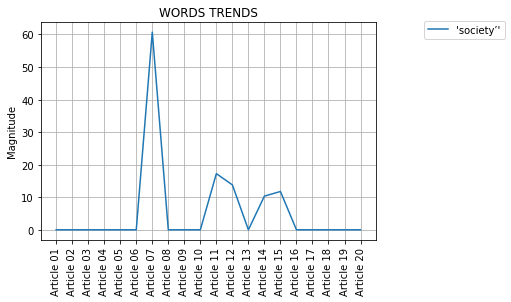

In [144]:
line_chart(dates,x_coordinates,words_in_dates,magnitude_per_words, convert=True)

/home/agha/Sir Naeem/next/project/Journalists
